# Alcohol Consumption arround the World
### Source: https://www.kaggle.com - This source contains the consumption of beer, spirits, wine and pure alcohol per country.
### The objetive of the project is:
- show the top 5 countries per drink
- show the consumption per continent
- show the average of drink per continent

In [2]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_alcohol = pd.read_csv('drinks.csv', na_filter=False)
df_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## Check some info about the df

In [4]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
df_alcohol.shape

(193, 6)

In [6]:
df_alcohol.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
# shows the memory usage of each column in the dataframe (in bytes)
df_alcohol.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       11387
dtype: int64

## Visualization

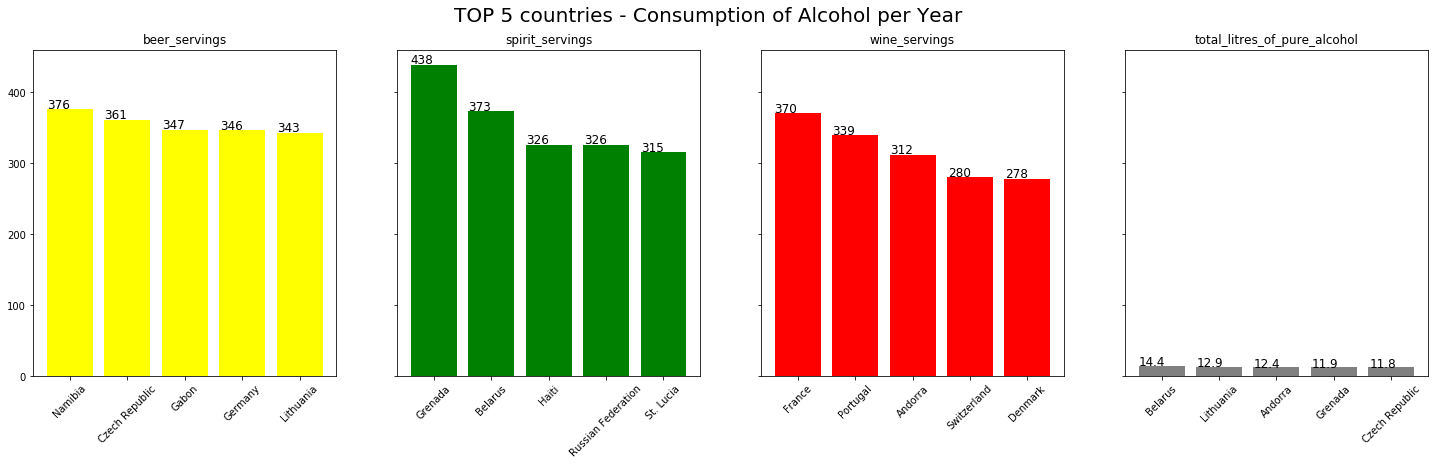

In [8]:
drinks = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
colors = ['yellow', 'green', 'red', 'gray']

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(25,6))
fig.suptitle('TOP 5 countries - Consumption of Alcohol per Year',fontsize=20)

for i, d in enumerate(drinks):
    df_top5 = df_alcohol.sort_values(by= d, ascending = False).head(5)

    ax[i].bar(df_top5['country'], df_top5[d], color=colors[i])
    ax[i].set_title(d)
    ax[i].set_xticklabels(labels=df_top5['country'], rotation=45)
    for p in ax[i].patches:
        num = p.get_height()
        ax[i].annotate(num, (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=12)

plt.show()

From the plot above we can confirm that among the countries with the highest alcohol consumption in the world,\
Grenada and Belarus are by far the ones who serve the most spirits.
The countries where beers are most common are Namibia and Czech Republic.\
And finally, France and Portugal serve the most wine.\
Observing the countries that consume pure alcohol, we can say that Belarus prefers spirits by far.

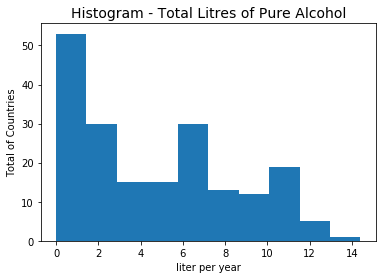

In [10]:
plt.title('Histogram - Total Litres of Pure Alcohol',fontsize=14)
plt.hist(df_alcohol['total_litres_of_pure_alcohol'])
plt.ylabel('Total of Countries')
plt.xlabel('liter per year')
plt.show()

Observing the histogram above, it is possible to observe that more than 50 countries consume up to 2 liters of pure alcohol per year.

In [11]:
# Let´s group the drinks by continent
df_alcohol_cont = df_alcohol.groupby('continent').sum()
df_alcohol_cont.reset_index(inplace = True)
df_alcohol_cont

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,AF,3258,866,862,159.4
1,AS,1630,2677,399,95.5
2,EU,8720,5965,6400,387.8
3,NA,3345,3812,564,137.9
4,OC,1435,935,570,54.1
5,SA,2101,1377,749,75.7


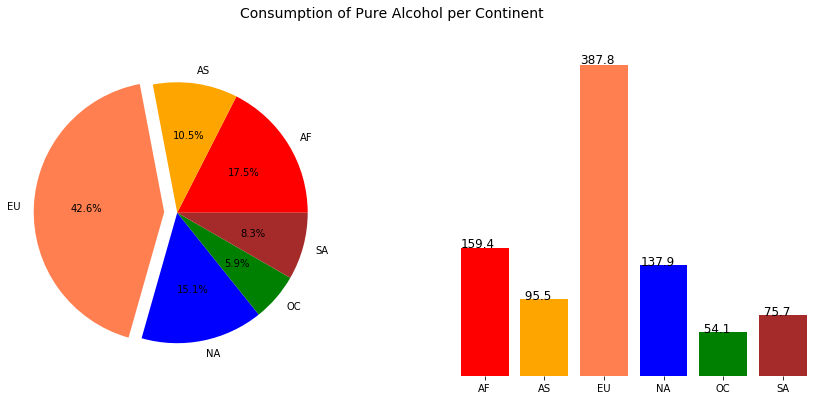

In [12]:
colors = ["red","orange","coral","blue","green","brown"]
fig,(ax1, ax2) =  plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Consumption of Pure Alcohol per Continent',fontsize=14)
ax1.pie(df_alcohol_cont['total_litres_of_pure_alcohol'],labels=df_alcohol_cont['continent'], autopct='%1.1f%%', explode = (0, 0, 0.1, 0, 0, 0),colors=colors)
ax2.bar(df_alcohol_cont["continent"],df_alcohol_cont["total_litres_of_pure_alcohol"], color=colors)
for p in ax2.patches:
        num = f"{p.get_height():5.1f}"
        ax2.annotate(num, (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=12)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.show()

Observing the plot above, Europe(387.8 liters) is by far the biggest consumer of alcohol among all continents with almost half of the consuming of alcohol.\
Followed by Africa and North America.\
Oceania has the lowest consumption of alcohol with 54.1 liters per year.

In [13]:
# Let´s check the Average of liters of consumption of Pure Alcohol
df_alcohol_cont_avg = df_alcohol.groupby('continent').mean()
df_alcohol_cont_avg.reset_index(inplace = True)
df_alcohol_cont_avg

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,AF,61.471698,16.339623,16.264151,3.007547
1,AS,37.045455,60.840909,9.068182,2.170455
2,EU,193.777778,132.555556,142.222222,8.617778
3,NA,145.434783,165.739130,24.521739,5.995652
4,OC,89.687500,58.437500,35.625000,3.381250
5,SA,175.083333,114.750000,62.416667,6.308333


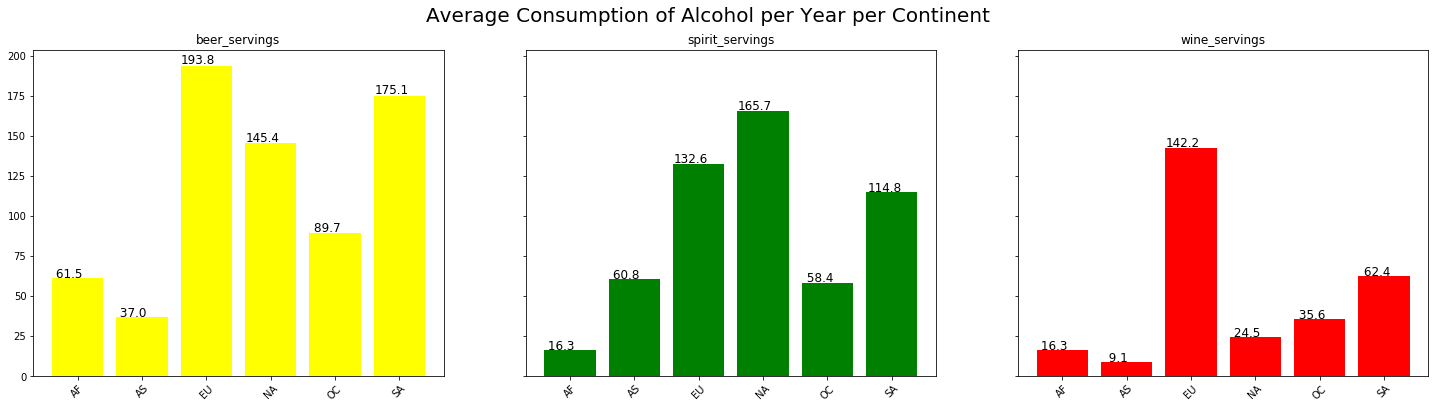

In [14]:
drinks = ['beer_servings', 'spirit_servings', 'wine_servings']
colors = ['yellow', 'green', 'red']

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(25,6))
fig.suptitle('Average Consumption of Alcohol per Year per Continent',fontsize=20)

for i, d in enumerate(drinks):
    
    ax[i].bar(df_alcohol_cont_avg['continent'], df_alcohol_cont_avg[d], color=colors[i])
    ax[i].set_title(d)
    ax[i].set_xticklabels(labels=df_alcohol_cont_avg['continent'], rotation=45)
    for p in ax[i].patches:
        num = f"{p.get_height():5.1f}"
        ax[i].annotate(num, (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=12)

plt.show()

The plot above illustrates the beer, spirit and wine average number of servings on each continent in the world. 
It is possible to observe that Europe has the highest average beer consumption overall but also the most significant average wine consumption numbers than anywhere else in the world. 
South America consumes a significant volume of beer, but different from Europe, South America does not have the wine culture.
North America and Asia consume more spirit then beer and wine.

# Conclusion 
From this analysis it is possible, through visualization, to observe that the biggest consumer of alcohol in the world is Europe, mainly the consumption of wine where the top 5 countries are from Europe.\
Next step, perhaps, another point to verify is the population, for example, where we can check the consumption of alcohol per inhabitants.